In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use('default')
#plt.rcParams['figure.figsize'] = (22, 12)
#sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
events = pd.read_csv('events.csv')

In [3]:
events.head(5)

,index,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2130678,2019-04-20 01:42:49.120,0,1891515180541284343,5857744372586891366,210,False,6287817205707153877,NaN,NaN,...,NaN,5.046185e+18,5b506964-5f47-4b28-a8c2-8a92d6c23379,NaN,5.882882e+18,NaN,False,NaN,7544543351571901618,3.301378e+18
1,2130680,2019-04-20 01:42:49.340,1,1891515180541284343,7642521036780133571,210,False,6287817205707153877,NaN,NaN,...,NaN,NaN,f1fb9d15-1a7b-4116-8d3b-c4c403e197e2,NaN,4.017674e+18,NaN,False,NaN,6949523255335024165,NaN
2,2130681,2019-04-20 01:42:49.365,1,1891515180541284343,2548841562898283198,210,False,6287817205707153877,NaN,NaN,...,NaN,NaN,c85a0b15-a5d7-472e-8116-6bfa3db19687,NaN,4.017674e+18,NaN,False,NaN,6428537280982666957,NaN
3,2130684,2019-04-20 01:42:51.438,2,1891515180541284343,609402887625919085,210,False,6287817205707153877,NaN,NaN,...,NaN,NaN,f4aa0a97-2de6-4f22-95c6-1b3150112cb9,NaN,6.168309e+18,NaN,False,NaN,7607371352198017145,NaN
4,2130688,2019-04-20 01:42:51.838,1,1891515180541284343,9114651763556439823,210,False,6287817205707153877,NaN,NaN,...,NaN,NaN,08e2f7f7-875f-4aa0-b337-b9b87b0d83ea,NaN,4.017674e+18,NaN,False,NaN,2901772839007473756,NaN


In [6]:
events.shape

(7744581, 23)

In [7]:
events.isna().sum().sort_values()

index                       0
date                        0
event_id                    0
ref_type                    0
ref_hash                    0
application_id              0
attributed                  0
device_countrycode          0
wifi                        0
ip_address                  0
kind                    29772
event_uuid              29772
session_user_agent      42280
device_model          2076489
device_language       2079172
user_agent            4403098
device_brand          5191157
device_os_version     5411606
carrier               5818680
device_city           5849646
device_os             5874391
connection_type       5935285
trans_id              7706939
dtype: int64

In [8]:
atributes_null = (events.isna().sum().sort_values() / events.shape[0]) * 100

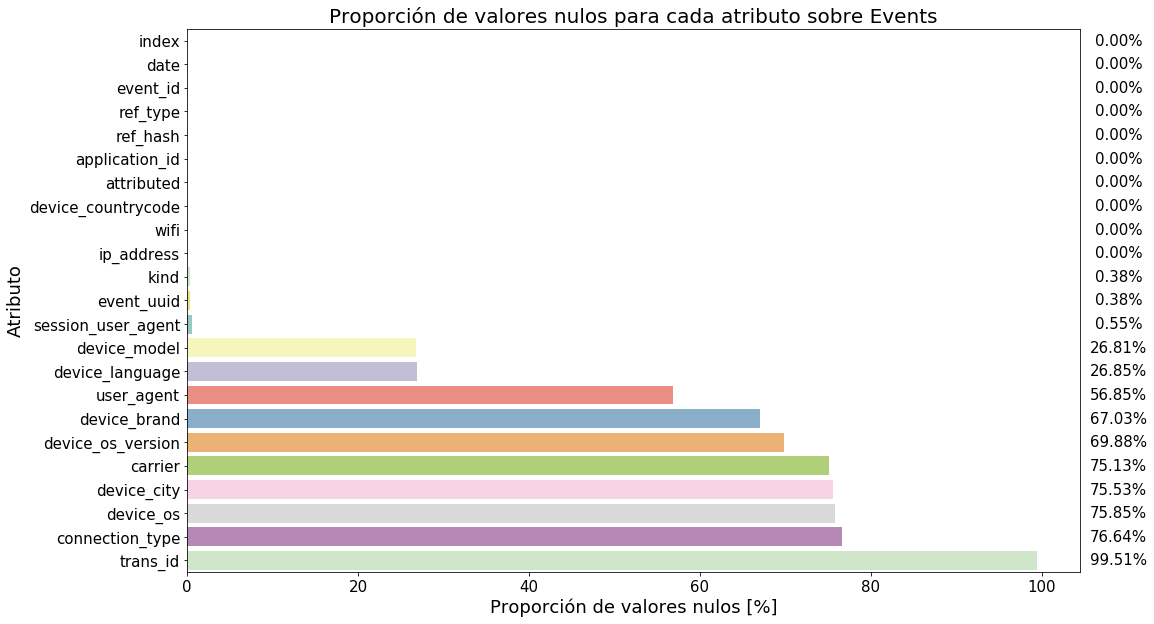

In [9]:
# Create barplot 
ax = sns.barplot(y=atributes_null.index, x=atributes_null.values, palette=sns.color_palette("Set3", 23), orient='h')
# Annotate every single Bar with its value, based on it's width 
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.title("Proporción de valores nulos para cada atributo sobre Events", fontsize=20)
ax.set_xlabel('Proporción de valores nulos [%]', fontsize=18)
ax.set_ylabel('Atributo', fontsize=18)
plt.xticks(size = 15)
plt.yticks(size = 15)

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_x()+109, p.get_y()+0.5*p.get_height(),
             '{:1.2f}'.format(width)+'%',
             ha='center', va='center', fontsize=15)

In [10]:
events.columns

Index(['index', 'date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_countrycode', 'device_os_version', 'device_brand',
       'device_model', 'device_city', 'session_user_agent', 'trans_id',
       'user_agent', 'event_uuid', 'carrier', 'kind', 'device_os', 'wifi',
       'connection_type', 'ip_address', 'device_language'],
      dtype='object')

In [11]:
events.attributed.value_counts()

False    7714809
True       29772
Name: attributed, dtype: int64

In [12]:
events['date_dt'] = pd.to_datetime(events.date, utc=True)
events.device_os.fillna("Vacio", inplace=True)
events.connection_type.fillna("Vacio", inplace=True)

In [13]:
#Solo un pais hay
events.device_countrycode.value_counts()

6287817205707153877    7744581
Name: device_countrycode, dtype: int64

In [14]:
events.wifi.fillna("Vacio", inplace=True)
events.wifi.value_counts()

False    5478103
True     2266478
Name: wifi, dtype: int64

## Se ven los Features 

In [90]:
events.head()

,index,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,...,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,date_dt,Cantidad,Cantidad_Eventos
0,2130678,2019-04-20 01:42:49.120,0,1891515180541284343,5857744372586891366,210,False,6287817205707153877,NaN,NaN,...,NaN,5.882882e+18,Vacio,False,Vacio,7544543351571901618,3.301378e+18,2019-04-20 01:42:49.120000+00:00,1,1
1,2130680,2019-04-20 01:42:49.340,1,1891515180541284343,7642521036780133571,210,False,6287817205707153877,NaN,NaN,...,NaN,4.017674e+18,Vacio,False,Vacio,6949523255335024165,NaN,2019-04-20 01:42:49.340000+00:00,1,1
2,2130681,2019-04-20 01:42:49.365,1,1891515180541284343,2548841562898283198,210,False,6287817205707153877,NaN,NaN,...,NaN,4.017674e+18,Vacio,False,Vacio,6428537280982666957,NaN,2019-04-20 01:42:49.365000+00:00,1,1
3,2130684,2019-04-20 01:42:51.438,2,1891515180541284343,609402887625919085,210,False,6287817205707153877,NaN,NaN,...,NaN,6.168309e+18,Vacio,False,Vacio,7607371352198017145,NaN,2019-04-20 01:42:51.438000+00:00,1,1
4,2130688,2019-04-20 01:42:51.838,1,1891515180541284343,9114651763556439823,210,False,6287817205707153877,NaN,NaN,...,NaN,4.017674e+18,Vacio,False,Vacio,2901772839007473756,NaN,2019-04-20 01:42:51.838000+00:00,1,1


In [89]:
events["date"] = pd.to_datetime(events["date"])

In [40]:
events.shape

(7744581, 24)

In [42]:
events.ref_hash.value_counts()

4318383038522881241    7638
2155691838866957318    5323
3815548115308518475    4514
5253641727446560887    3243
3952155016671191401    3097
2574473524044264104    2989
8439780424768274774    2815
3932986466692294111    2752
3772650734287615280    2668
7010373312409084835    2519
4968443125728046395    2462
8034924370422047932    2395
2423447003673514188    2389
1713115242352816462    2348
2038143085476644901    2297
6399527894461540039    2259
8439794068861712609    2245
3743039286599122286    2187
8149667409285468126    2180
4520696625770140528    2177
2177050557380211509    2124
2672618552794271167    2043
8565365093157573894    2042
194039492458701746     2036
5511799915109511592    2014
6307409859339431829    2012
6940660333341615748    1998
2731408201819740777    1987
2339816495058482866    1947
6232653565604507789    1932
                       ... 
6326303921595190115       1
5192809184887322175       1
6687305406685017973       1
8583079118144152120       1
1360785643906185651 

In [102]:
events["Cantidad_Eventos"] = 1

## Cantidad total de eventos de cada usuario

In [78]:
eventos_totales = events.groupby("ref_hash").agg({"Cantidad_Eventos":"count"}).reset_index().sort_values(by= "Cantidad_Eventos", ascending = False)
eventos_totales

,ref_hash,Cantidad_Eventos
170262,4318383038522881241,7638
84821,2155691838866957318,5323
150536,3815548115308518475,4514
206984,5253641727446560887,3243
155954,3952155016671191401,3097
101377,2574473524044264104,2989
331939,8439780424768274774,2815
155215,3932986466692294111,2752
148805,3772650734287615280,2668
275994,7010373312409084835,2519


In [52]:
events.loc[events.ref_hash == 4318383038522881241] 

,index,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,...,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,date_dt,Cantidad
66060,49,2019-04-25 23:36:56.261,5,1891515180541284343,4318383038522881241,269,False,6287817205707153877,5.908703e+17,NaN,...,ca2f3f20-13ed-44ba-b68f-199e4f94757a,1.515556e+18,9.208056e+18,7.53167e+18,False,Cable/DSL,5209284498871100539,3.301378e+18,2019-04-25 23:36:56.261000+00:00,1
66344,333,2019-04-25 23:37:43.506,5,1891515180541284343,4318383038522881241,269,False,6287817205707153877,5.908703e+17,NaN,...,3063eb29-a766-4e89-916d-5f7da8d63161,1.515556e+18,9.208056e+18,7.53167e+18,False,Cable/DSL,5209284498871100539,3.301378e+18,2019-04-25 23:37:43.506000+00:00,1
66346,335,2019-04-25 23:37:38.110,5,1891515180541284343,4318383038522881241,269,False,6287817205707153877,5.908703e+17,NaN,...,53283cef-bd44-447c-bc7f-b153f489b7f5,1.515556e+18,9.208056e+18,7.53167e+18,False,Cable/DSL,5209284498871100539,3.301378e+18,2019-04-25 23:37:38.110000+00:00,1
66348,337,2019-04-25 23:37:39.606,5,1891515180541284343,4318383038522881241,269,False,6287817205707153877,5.908703e+17,NaN,...,5b3fe22a-8f24-4841-8d29-2797b0395748,1.515556e+18,9.208056e+18,7.53167e+18,False,Cable/DSL,5209284498871100539,3.301378e+18,2019-04-25 23:37:39.606000+00:00,1
66358,347,2019-04-25 23:37:41.881,5,1891515180541284343,4318383038522881241,269,False,6287817205707153877,5.908703e+17,NaN,...,c2f51e8c-34b5-4156-a9c4-f1067a8b7008,1.515556e+18,9.208056e+18,7.53167e+18,False,Cable/DSL,5209284498871100539,3.301378e+18,2019-04-25 23:37:41.881000+00:00,1
66508,528,2019-04-25 23:57:26.208,5,1891515180541284343,4318383038522881241,269,False,6287817205707153877,5.908703e+17,NaN,...,a2539807-a360-4bbf-b9da-9eab5a9b82d7,1.515556e+18,9.208056e+18,7.53167e+18,False,Cable/DSL,5209284498871100539,3.301378e+18,2019-04-25 23:57:26.208000+00:00,1
66513,533,2019-04-25 23:57:34.291,5,1891515180541284343,4318383038522881241,269,False,6287817205707153877,5.908703e+17,NaN,...,37f19609-0aa1-4775-a972-63172c2f1997,1.515556e+18,9.208056e+18,7.53167e+18,False,Cable/DSL,5209284498871100539,3.301378e+18,2019-04-25 23:57:34.291000+00:00,1
66518,538,2019-04-25 23:57:15.249,5,1891515180541284343,4318383038522881241,269,False,6287817205707153877,5.908703e+17,NaN,...,38977a8b-7fff-4312-aa5d-8ad8f2e3bd31,1.515556e+18,9.208056e+18,7.53167e+18,False,Cable/DSL,5209284498871100539,3.301378e+18,2019-04-25 23:57:15.249000+00:00,1
66519,539,2019-04-25 23:57:20.325,5,1891515180541284343,4318383038522881241,269,False,6287817205707153877,5.908703e+17,NaN,...,336bca2c-8e05-481b-b83d-b86d845cf98a,1.515556e+18,9.208056e+18,7.53167e+18,False,Cable/DSL,5209284498871100539,3.301378e+18,2019-04-25 23:57:20.325000+00:00,1
66535,555,2019-04-25 23:00:30.400,5,1891515180541284343,4318383038522881241,269,False,6287817205707153877,5.908703e+17,NaN,...,dc0dbab3-76d7-4ccf-85c1-c4767a2a8c1a,1.515556e+18,9.208056e+18,7.53167e+18,False,Cable/DSL,5209284498871100539,3.301378e+18,2019-04-25 23:00:30.400000+00:00,1


In [73]:
events.event_id.value_counts().to_frame()

,event_id
1,1281105
15,1005533
23,702708
2,621588
115,524729
0,404736
13,260978
7,256957
5,250572
101,218849


### Evento mas utilizado de cada usuario y su cantidad

In [70]:
evento_con_mas_apericiones = events.groupby(["ref_hash","event_id"]).agg({"Cantidad_Eventos":"count"}).reset_index().sort_values(by= "Cantidad_Eventos", ascending = False)

In [77]:
evento_con_mas_apericiones = evento_con_mas_apericiones.drop_duplicates(subset = "ref_hash", keep = "first")
evento_con_mas_apericiones.loc[:,["ref_hash","event_id"]]

,ref_hash,event_id
479624,4318383038522881241,5
423630,3815548115308518475,211
238705,2155691838866957318,115
890174,8034924370422047932,5
190086,1713115242352816462,5
551380,4968443125728046395,5
709811,6399527894461540039,211
268756,2423447003673514188,211
21528,194039492458701746,23
225832,2038143085476644901,5


In [72]:
evento_con_mas_apericiones.event_id.value_counts()

23     94016
15     71757
7      32317
1      23158
0      18762
245    16301
2      13488
101     8190
287     7237
115     6881
39      6241
296     6044
13      5601
363     5350
106     5251
100     5076
345     3053
157     2645
216     2465
5       2129
24      1593
211     1520
28      1482
27      1065
12      1005
118      942
104      892
38       831
158      749
110      648
       ...  
294        1
56         1
568        1
60         1
547        1
573        1
575        1
576        1
321        1
544        1
331        1
76         1
336        1
82         1
399        1
344        1
92         1
348        1
362        1
367        1
368        1
374        1
378        1
379        1
277        1
125        1
382        1
19         1
300        1
511        1
Name: event_id, Length: 292, dtype: int64

In [ ]:
#Hago un merge para quedarme con los features

In [80]:
df_eventos_feature = evento_con_mas_apericiones.merge(eventos_totales, on = "ref_hash", how = "inner")

In [86]:
df_eventos_feature.columns = ["device_id","mejor_evento","cant_mejor_evento","cant_total_de_eventos"]

In [87]:
df_eventos_feature

,device_id,mejor_evento,cant_mejor_evento,cant_total_de_eventos
0,4318383038522881241,5,7325,7638
1,3815548115308518475,211,4185,4514
2,2155691838866957318,115,2534,5323
3,8034924370422047932,5,2276,2395
4,1713115242352816462,5,2236,2348
5,4968443125728046395,5,2225,2462
6,6399527894461540039,211,2213,2259
7,2423447003673514188,211,2155,2389
8,194039492458701746,23,2005,2036
9,2038143085476644901,5,1973,2297


### Separo en tres periodos y veo la cantidad total de eventos de cada usuario para cada periodo 

In [88]:
#Trato de hacer cada tres dias la cantidad de eventos

In [91]:
events.date_dt.min()

Timestamp('2019-04-18 00:00:00.027000+0000', tz='UTC')

In [92]:
events.date_dt.max()

Timestamp('2019-04-26 23:59:59.881000+0000', tz='UTC')

In [99]:
events.loc[((events["date"] < "2019-04-21")), "Periodo"] = "Primero"
events.loc[((events["date"] > "2019-04-20") & (events["date"] < "2019-04-24") ), "Periodo"] = "Segundo"
events.loc[((events["date"] > "2019-04-23")), "Periodo"] = "Tercero"

In [122]:
events_periodos = events.groupby(["ref_hash","Periodo"]).agg({"Cantidad_Eventos":"sum"})

In [123]:
periodos_unstack = events_periodos.unstack().reset_index()

In [124]:
periodos_unstack.columns = ["device_id","Primer_Periodo","Segundo_Periodo","Tercer_Periodo"]

In [125]:
periodos_unstack.fillna(0, inplace= True)

In [126]:
periodos_unstack

,device_id,Primer_Periodo,Segundo_Periodo,Tercer_Periodo
0,40621409780134,0.0,6.0,3.0
1,41863526108385,45.0,51.0,57.0
2,69039685746313,0.0,0.0,20.0
3,90072729247980,0.0,0.0,3.0
4,161514654074162,8.0,51.0,9.0
5,168103949904656,0.0,10.0,3.0
6,186034136943920,13.0,28.0,73.0
7,283297668933729,0.0,64.0,208.0
8,342614246084071,0.0,0.0,1.0
9,347785260789835,0.0,0.0,1.0


In [127]:
df_eventos_feature = df_eventos_feature.merge(periodos_unstack, on = "device_id", how = "inner")

In [128]:
df_eventos_feature

,device_id,mejor_evento,cant_mejor_evento,cant_total_de_eventos,Primer_Periodo,Segundo_Periodo,Tercer_Periodo
0,4318383038522881241,5,7325,7638,0.0,0.0,7638.0
1,3815548115308518475,211,4185,4514,0.0,949.0,3565.0
2,2155691838866957318,115,2534,5323,891.0,2173.0,2259.0
3,8034924370422047932,5,2276,2395,0.0,0.0,2395.0
4,1713115242352816462,5,2236,2348,0.0,0.0,2348.0
5,4968443125728046395,5,2225,2462,0.0,0.0,2462.0
6,6399527894461540039,211,2213,2259,1249.0,146.0,864.0
7,2423447003673514188,211,2155,2389,0.0,2091.0,298.0
8,194039492458701746,23,2005,2036,266.0,742.0,1028.0
9,2038143085476644901,5,1973,2297,0.0,0.0,2297.0
